# Step 1 - Acquire Data

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# READ THE DATA
house_data = pd.read_csv('https://raw.githubusercontent.com/zekelabs/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt', index_col='Unnamed: 0')

In [9]:
# OVERVIEW HOW'S THE DATA LOOK LIKE
house_data.head()

,Sqft,Floor,TotalFloor,Bedroom,Livingroom,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000


In [10]:
# FOR THE SHAKE OF CLEAN NAMING. RENAME THE COLUMN
house_data.rename(columns={'Living.Room':'Livingroom'}, inplace=True)

# Step 2A - Explore Data

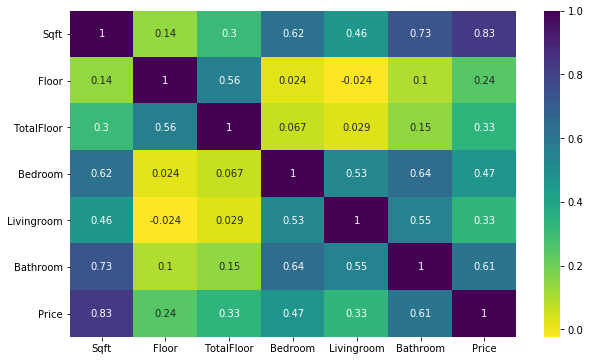

In [13]:
#CORRELATIONS BETWEEN FEATURE
cm = house_data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis_r')

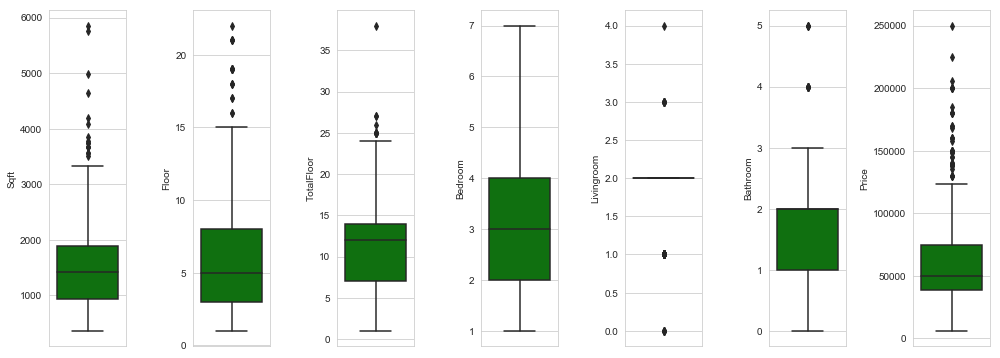

In [18]:
# Outliers for each feature
columns = house_data.columns.tolist()
number_of_columns = len(columns)
number_of_rows = len(columns)-1/number_of_columns
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(columns)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(house_data[columns[i]],color='green',orient='v')
    plt.tight_layout()

In [71]:
house_data[house_data['Price'] < 125000].describe().T

,count,mean,std,min,25%,50%,75%,max
Sqft,604.0,1413.344811,594.651816,359.358,925.08,1384.062,1814.58,3558.0
Floor,604.0,5.698675,3.498675,1.000,3.00,5.000,7.00,22.0
TotalFloor,604.0,10.602649,4.758276,1.000,7.00,11.000,14.00,27.0
Bedroom,604.0,2.771523,0.979449,1.000,2.00,3.000,4.00,5.0
Livingroom,604.0,1.793046,0.451882,0.000,2.00,2.000,2.00,3.0
Bathroom,604.0,1.738411,0.599432,0.000,1.00,2.000,2.00,5.0
Price,604.0,55085.826159,23490.694716,6100.000,38000.00,49800.000,69000.00,123456.0


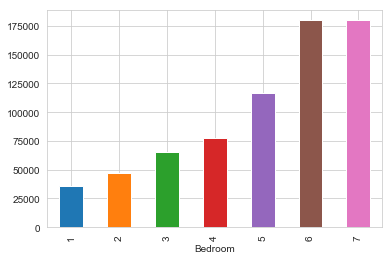

In [33]:
# GENERAL TRENDS GROUP BY BEDROOM
house_data.groupby(['Bedroom'])['Price'].agg('mean').plot('bar')

In [38]:
# DESCRIBING THE DATA
house_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sqft,645.0,1527.656260,767.386531,359.358,925.08,1423.2,1892.856,5856.468
Floor,645.0,5.939535,3.884721,1.000,3.00,5.0,8.000,22.000
TotalFloor,645.0,10.855814,4.996208,1.000,7.00,12.0,14.000,38.000
Bedroom,645.0,2.837209,1.010740,1.000,2.00,3.0,4.000,7.000
Livingroom,645.0,1.813953,0.462364,0.000,2.00,2.0,2.000,4.000
Bathroom,645.0,1.810853,0.683574,0.000,1.00,2.0,2.000,5.000
Price,645.0,61986.823256,35635.091007,6100.000,39000.00,50000.0,75000.000,250000.000


# Step 2B - Preprocess Data

In [80]:
house_data.isnull().sum(axis=0)

Sqft          0
Floor         0
TotalFloor    0
Bedroom       0
Livingroom    0
Bathroom      0
Price         0
dtype: int64

house_data (645, 7)
processed_data (608, 7)


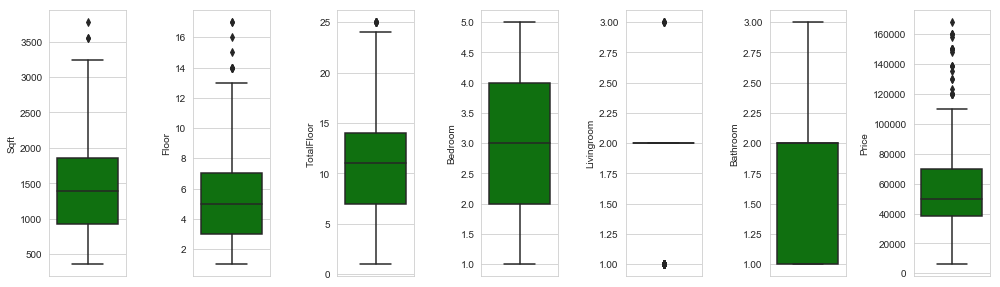

In [190]:
# REMOVING THE OUTLIERS USING Z-score (+- 3 is a rule thumb for z-score threshold)

from scipy import stats
import numpy as np
processed_data = house_data.copy()
processed_data = processed_data[(np.abs(stats.zscore(processed_data)) < 3).all(axis=1)]
print("house_data",house_data.shape)
print("processed_data",processed_data.shape)

# Outliers for each feature
columns = processed_data.columns.tolist()
number_of_columns = len(columns)
number_of_rows = len(columns)-1/number_of_columns
plt.figure(figsize=(2*number_of_columns,4*number_of_rows))
for i in range(0,len(columns)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(processed_data[columns[i]],color='green',orient='v')
    plt.tight_layout()

In [168]:
# SELECTION OF FEATURE AND TARGET VARIABLE
feature = processed_data.columns.tolist()
feature.remove('Price')

In [169]:
feature_data = processed_data[feature]

In [170]:
target_data = processed_data.Price

# Step 3 - Analyze Data

#### COLUMN WILL BE REFER AS FEATURE. FEATURE ALSO REFER AS INDEPENDENT VARIABLE IN REGRESSION FUNCTION

In [194]:
# SPLIT THE DATASET FOR TRAINING AND TESTING DATA

from sklearn.model_selection import train_test_split
trainX,testX, trainY,testY = train_test_split(feature_data, target_data,test_size=0.2)

In [195]:
trainX.shape

(486, 6)

In [196]:
testX.shape

(122, 6)

In [197]:
# BUILD MODEL USING LINEAR REGRESSION

from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)

In [198]:
# MODEL TRAINING
lr.fit(trainX,trainY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [199]:
# SEE THE COEFFICIENT OF EACH FEATURES AF
lr.coef_
coef = pd.DataFrame(lr.coef_, index = trainX.columns)
coef

,0
Sqft,31.824067
Floor,669.468871
TotalFloor,542.809270
Bedroom,-98.455121
Livingroom,-3737.112035
Bathroom,3942.795909


Text(0.5, 1.0, 'Feature importance using Linear Regression')

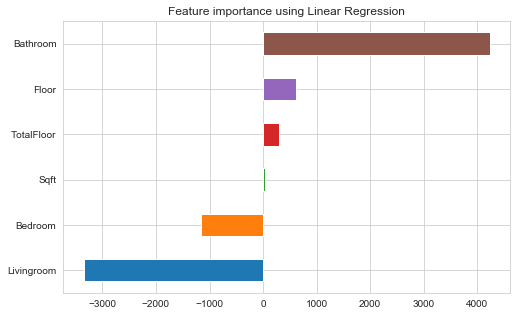

In [205]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 5.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Linear Regression")

# Model Evaluation

In [177]:
# ACTUAL DATA FOR TESTING
testX[:5].copy()

,Sqft,Floor,TotalFloor,Bedroom,Livingroom,Bathroom
179,1889.298,2,14,4,2,2
143,1223.952,6,7,4,2,2
389,2312.700,7,15,4,2,2
442,1423.200,3,7,3,2,2
573,700.926,7,11,2,1,1


In [178]:
# ACTUAL DATA TARGET FOR TESTING
testY[:5]

179    100000
143     58888
389     70000
442     68000
573     40000
Name: Price, dtype: int64

In [206]:
# EVALUATE PREDICTION RESULT VS ACTUAL

test_data = testX[:5].copy()
test_data['Actual'] = testY[:5]
test_data['Pred'] = lr.predict(testX[:5])
test_data

,Sqft,Floor,TotalFloor,Bedroom,Livingroom,Bathroom,Actual,Pred
623,925.080,4,9,3,2,2,45000,39622.788691
352,925.080,2,4,2,1,1,31999,35462.575849
123,1280.880,10,12,3,2,2,53000,56591.032700
367,711.600,6,14,1,1,1,39000,36873.197365
606,1892.856,5,12,4,2,2,129999,72620.798344


,Sqft,Floor,TotalFloor,Bedroom,Livingroom,Bathroom,Actual,Pred
179,1889.298,2,14,4,2,2,100000,71272.570416
143,1223.952,6,7,4,2,2,58888,49396.533899
389,2312.700,7,15,4,2,2,70000,88786.666757
442,1423.200,3,7,3,2,2,68000,55365.714489
573,700.926,7,11,2,1,1,40000,35222.375516


In [181]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [182]:
pred = lr.predict(testX)

In [183]:
MAE = mean_absolute_error(y_pred=pred, y_true=testY)
print("MAE : ",MAE)

MAE :  11710.019503701038


In [184]:
RMSE = np.sqrt(mean_squared_error(y_pred=pred, y_true=testY))
print("RMSE : ",RMSE)

RMSE :  14771.874921382456
